Tournament Link : [here is the tournament](https://www.kaggle.com/competitions/spaceship-titanic/team)

Refrensi :

1. https://www.kaggle.com/code/arunklenin/ps4e3-steel-plate-fault-prediction-multilabel/output?select=submission_pure.csv
2. https://www.kaggle.com/code/aspillai/steel-plate-defect-prediction-lightgbm-0-89395/notebook
3. https://www.kaggle.com/code/aspillai/steel-plate-defect-binary-xgboost-0-89478/notebook
4. https://www.kaggle.com/code/shantanugupta2004/steel-plate-xgboost-hyperparameter-0-893-score/notebook

# Import Library Needed

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import time
import os

import warnings
warnings.filterwarnings('ignore')


# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
# pd.set_option("display.max_row", None)


def check_duplicates(dataframe):
    """
    Memeriksa nilai duplikat dari DataFrame dan mencetak nama variabelnya.
    """

    # Menampilkan nilai duplikat
    print("Nilai Duplikat (10 Teratas):")
    duplicate_values = dataframe[dataframe.duplicated()]
    print(f"Jumlah Duplikat data: {duplicate_values.shape[0]}")
    display(duplicate_values.head(10))

def missing_data(data):
    total_missing = data.isnull().sum()
    if total_missing.sum() == 0:
        print("Tidak ada data yang hilang.")
    else:
        total = total_missing.sort_values(ascending=False)
        percent = (total_missing / len(data)) * 100
        missing_info = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        print("Data yang hilang:")
        print(missing_info)

def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum()
    sum['missing%'] = (df.isna().sum())/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    sum['uniques%'] = (df.nunique().values)/df.count().values
    return sum

In [ ]:
pip install category_encoders optuna catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import random as rn

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from category_encoders import OneHotEncoder, CatBoostEncoder, MEstimateEncoder
from sklearn.model_selection import StratifiedGroupKFold

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression

from sklearn import set_config
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from prettytable import PrettyTable

from sklearn.compose import make_column_transformer
from sklearn.base import clone
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from optuna.samplers import TPESampler
import optuna

os.environ['PYTHONHASHSEED'] = '51'
rn.seed(89)

# Read Data

In [ ]:
df_original   = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Satria Data 2024/Steel Plate Defect Prediction/Dataset/faults.csv') # Original Data

df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Satria Data 2024/Steel Plate Defect Prediction/Dataset/train.csv') # Train Data
df_test  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Satria Data 2024/Steel Plate Defect Prediction/Dataset/test.csv') # Test Data
sample_submission  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Satria Data 2024/Steel Plate Defect Prediction/Dataset/sample_submission.csv') # Submissions Data

In [ ]:
df_test2 = df_test.copy()
df_train2 = df_train.copy()
df_orginal2 = df_original.copy()

# Exploratory Data Analysis


In [ ]:
data = [df_original, df_train, df_test, sample_submission]
nama_dataframe = ["df_original", "df_train", "df_test", "sample_submission"]

## Shape of Dataframe

In [ ]:
for n, dataframe in enumerate(data):
  print(f"------ Memeriksa ukuran DATAFRAME: {nama_dataframe[n]} ------")
  print(f"Baris :{dataframe.shape[0]}, Kolom :{dataframe.shape[1]}\n")

------ Memeriksa ukuran DATAFRAME: df_original ------
Baris :1941, Kolom :34

------ Memeriksa ukuran DATAFRAME: df_train ------
Baris :19219, Kolom :35

------ Memeriksa ukuran DATAFRAME: df_test ------
Baris :12814, Kolom :28

------ Memeriksa ukuran DATAFRAME: sample_submission ------
Baris :12814, Kolom :8



In [ ]:
for n, dataframe in enumerate(data):
  print(f"------ Memeriksa Kolom yang ada pada DATAFRAME: {nama_dataframe[n]} ------")
  print(dataframe.columns.tolist(),"\n")

------ Memeriksa Kolom yang ada pada DATAFRAME: df_original ------
['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'] 

------ Memeriksa Kolom yang ada pada DATAFRAME: df_train ------
['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_

## Check Duplicate Data

In [ ]:
df_train.drop(columns='id', axis=1, inplace=True)
df_test.drop(columns='id', axis=1, inplace=True)

In [ ]:
for n, dataframe in enumerate(data):
  print(f"------ Memeriksa duplikat untuk DATAFRAME: {nama_dataframe[n]} ------")
  check_duplicates(dataframe)
  print("\n")

------ Memeriksa duplikat untuk DATAFRAME: df_original ------
Nilai Duplikat (10 Teratas):
Jumlah Duplikat data: 0


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults




------ Memeriksa duplikat untuk DATAFRAME: df_train ------
Nilai Duplikat (10 Teratas):
Jumlah Duplikat data: 0


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults




------ Memeriksa duplikat untuk DATAFRAME: df_test ------
Nilai Duplikat (10 Teratas):
Jumlah Duplikat data: 0


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas




------ Memeriksa duplikat untuk DATAFRAME: sample_submission ------
Nilai Duplikat (10 Teratas):
Jumlah Duplikat data: 0


,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults


## Check Missing Data

In [ ]:
for n, dataframe in enumerate(data):
  print(f"------ Memeriksa Missing Data pada DATAFRAME: {nama_dataframe[n]} ------")
  missing_data(dataframe)
  print("\n")

------ Memeriksa Missing Data pada DATAFRAME: df_original ------
Tidak ada data yang hilang.


------ Memeriksa Missing Data pada DATAFRAME: df_train ------
Tidak ada data yang hilang.


------ Memeriksa Missing Data pada DATAFRAME: df_test ------
Tidak ada data yang hilang.


------ Memeriksa Missing Data pada DATAFRAME: sample_submission ------
Tidak ada data yang hilang.




## Check Describe Dataframe


In [ ]:
for n, dataframe in enumerate(data):
  print(f"------ Deskripsi untuk DATAFRAME: {nama_dataframe[n]} ------")
  display(dataframe.describe())

------ Deskripsi untuk DATAFRAME: df_original ------


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,1459.160227,0.400309,0.599691,78.737764,0.331715,0.414203,0.570767,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,144.577823,0.490087,0.490087,55.086032,0.299712,0.137261,0.271058,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.060400,0.315800,0.361300,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,70.000000,0.227300,0.412100,0.555600,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,1650.000000,1.000000,1.000000,80.000000,0.573800,0.501600,0.818200,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


------ Deskripsi untuk DATAFRAME: df_train ------


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,128.647380,1459.350747,0.402674,0.596337,76.213122,0.352939,0.409309,0.574520,0.030609,0.614749,0.831652,0.591899,2.473475,1.312667,1.389737,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,14.196976,145.568687,0.490449,0.490644,53.931960,0.318976,0.124143,0.259436,0.047302,0.222391,0.220966,0.482050,0.760575,0.467848,0.405549,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,39.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.105000,0.000000,0.778200,0.301000,0.000000,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.058600,0.317500,0.375750,0.006600,0.451600,0.655200,0.000000,1.949400,1.000000,1.079200,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,69.000000,0.238500,0.413500,0.545400,0.009500,0.636400,0.964300,1.000000,2.227900,1.146100,1.322200,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,135.000000,1652.000000,1.000000,1.000000,80.000000,0.656100,0.494600,0.818200,0.019100,0.785700,1.000000,1.000000,2.814900,1.431400,1.707600,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.927500,1.000000,0.665100,1.000000,1.000000,1.000000,4.554300,2.997300,4.033300,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


------ Deskripsi untuk DATAFRAME: df_test ------


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,12814.000000,12814.000000,1.281400e+04,1.281400e+04,12814.000000,12814.000000,12814.000000,1.281400e+04,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000
mean,709.331356,753.274934,1.846533e+06,1.842029e+06,1672.908225,96.459497,64.730607,1.926893e+05,84.548072,128.688856,1460.135633,0.405182,0.593882,75.868659,0.354008,0.408508,0.573603,0.030695,0.618650,0.833823,0.584985,2.472743,1.311689,1.388119,0.101164,-0.139516,0.572401
std,531.878508,500.743570,1.916427e+06,1.911426e+06,3725.518996,219.928548,188.506385,4.812871e+05,28.711574,14.280995,146.110873,0.490946,0.491126,53.487324,0.318958,0.124507,0.258261,0.048663,0.220361,0.220306,0.483308,0.761108,0.467621,0.401725,0.488127,0.117878,0.331974
min,0.000000,4.000000,6.712000e+03,6.724000e+03,4.000000,2.000000,2.000000,5.350000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.009000,0.001500,0.014400,0.066700,0.000000,0.778200,0.344400,0.301000,-0.991000,-0.998900,0.119000
25%,46.000000,214.000000,6.401738e+05,6.398570e+05,91.000000,15.000000,14.000000,9.968000e+03,68.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.058600,0.316200,0.375000,0.006600,0.455075,0.666700,0.000000,1.959000,1.000000,1.079200,-0.277800,-0.192600,0.257000
50%,776.000000,796.000000,1.378890e+06,1.378588e+06,169.000000,24.000000,24.000000,1.840200e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,69.000000,0.247400,0.412100,0.541700,0.009500,0.638700,0.967700,1.000000,2.227900,1.146100,1.322200,0.111100,-0.143900,0.472900
75%,1152.000000,1167.000000,2.368032e+06,2.356238e+06,649.000000,64.000000,60.000000,6.696025e+04,105.000000,135.000000,1652.000000,1.000000,1.000000,80.000000,0.654400,0.493800,0.818200,0.019075,0.785700,1.000000,1.000000,2.814125,1.431400,1.707600,0.529400,-0.084300,0.999200
max,1688.000000,1712.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1727.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.747200,1.000000,1.000000,1.000000,4.680200,2.938500,4.258700,0.973900,0.591700,1.000000


------ Deskripsi untuk DATAFRAME: sample_submission ------


,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,12814.000000,12814.0,12814.0,12814.0,12814.0,12814.0,12814.0,12814.0
mean,25625.500000,0.5,0.5,0.5,0.5,0.5,0.5,0.5
std,3699.227509,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,19219.000000,0.5,0.5,0.5,0.5,0.5,0.5,0.5
25%,22422.250000,0.5,0.5,0.5,0.5,0.5,0.5,0.5
50%,25625.500000,0.5,0.5,0.5,0.5,0.5,0.5,0.5
75%,28828.750000,0.5,0.5,0.5,0.5,0.5,0.5,0.5
max,32032.000000,0.5,0.5,0.5,0.5,0.5,0.5,0.5


## Feature Distributions

In [ ]:
train_copy = df_train.copy()
test_copy = df_test.copy()
original_copy = df_original.copy()

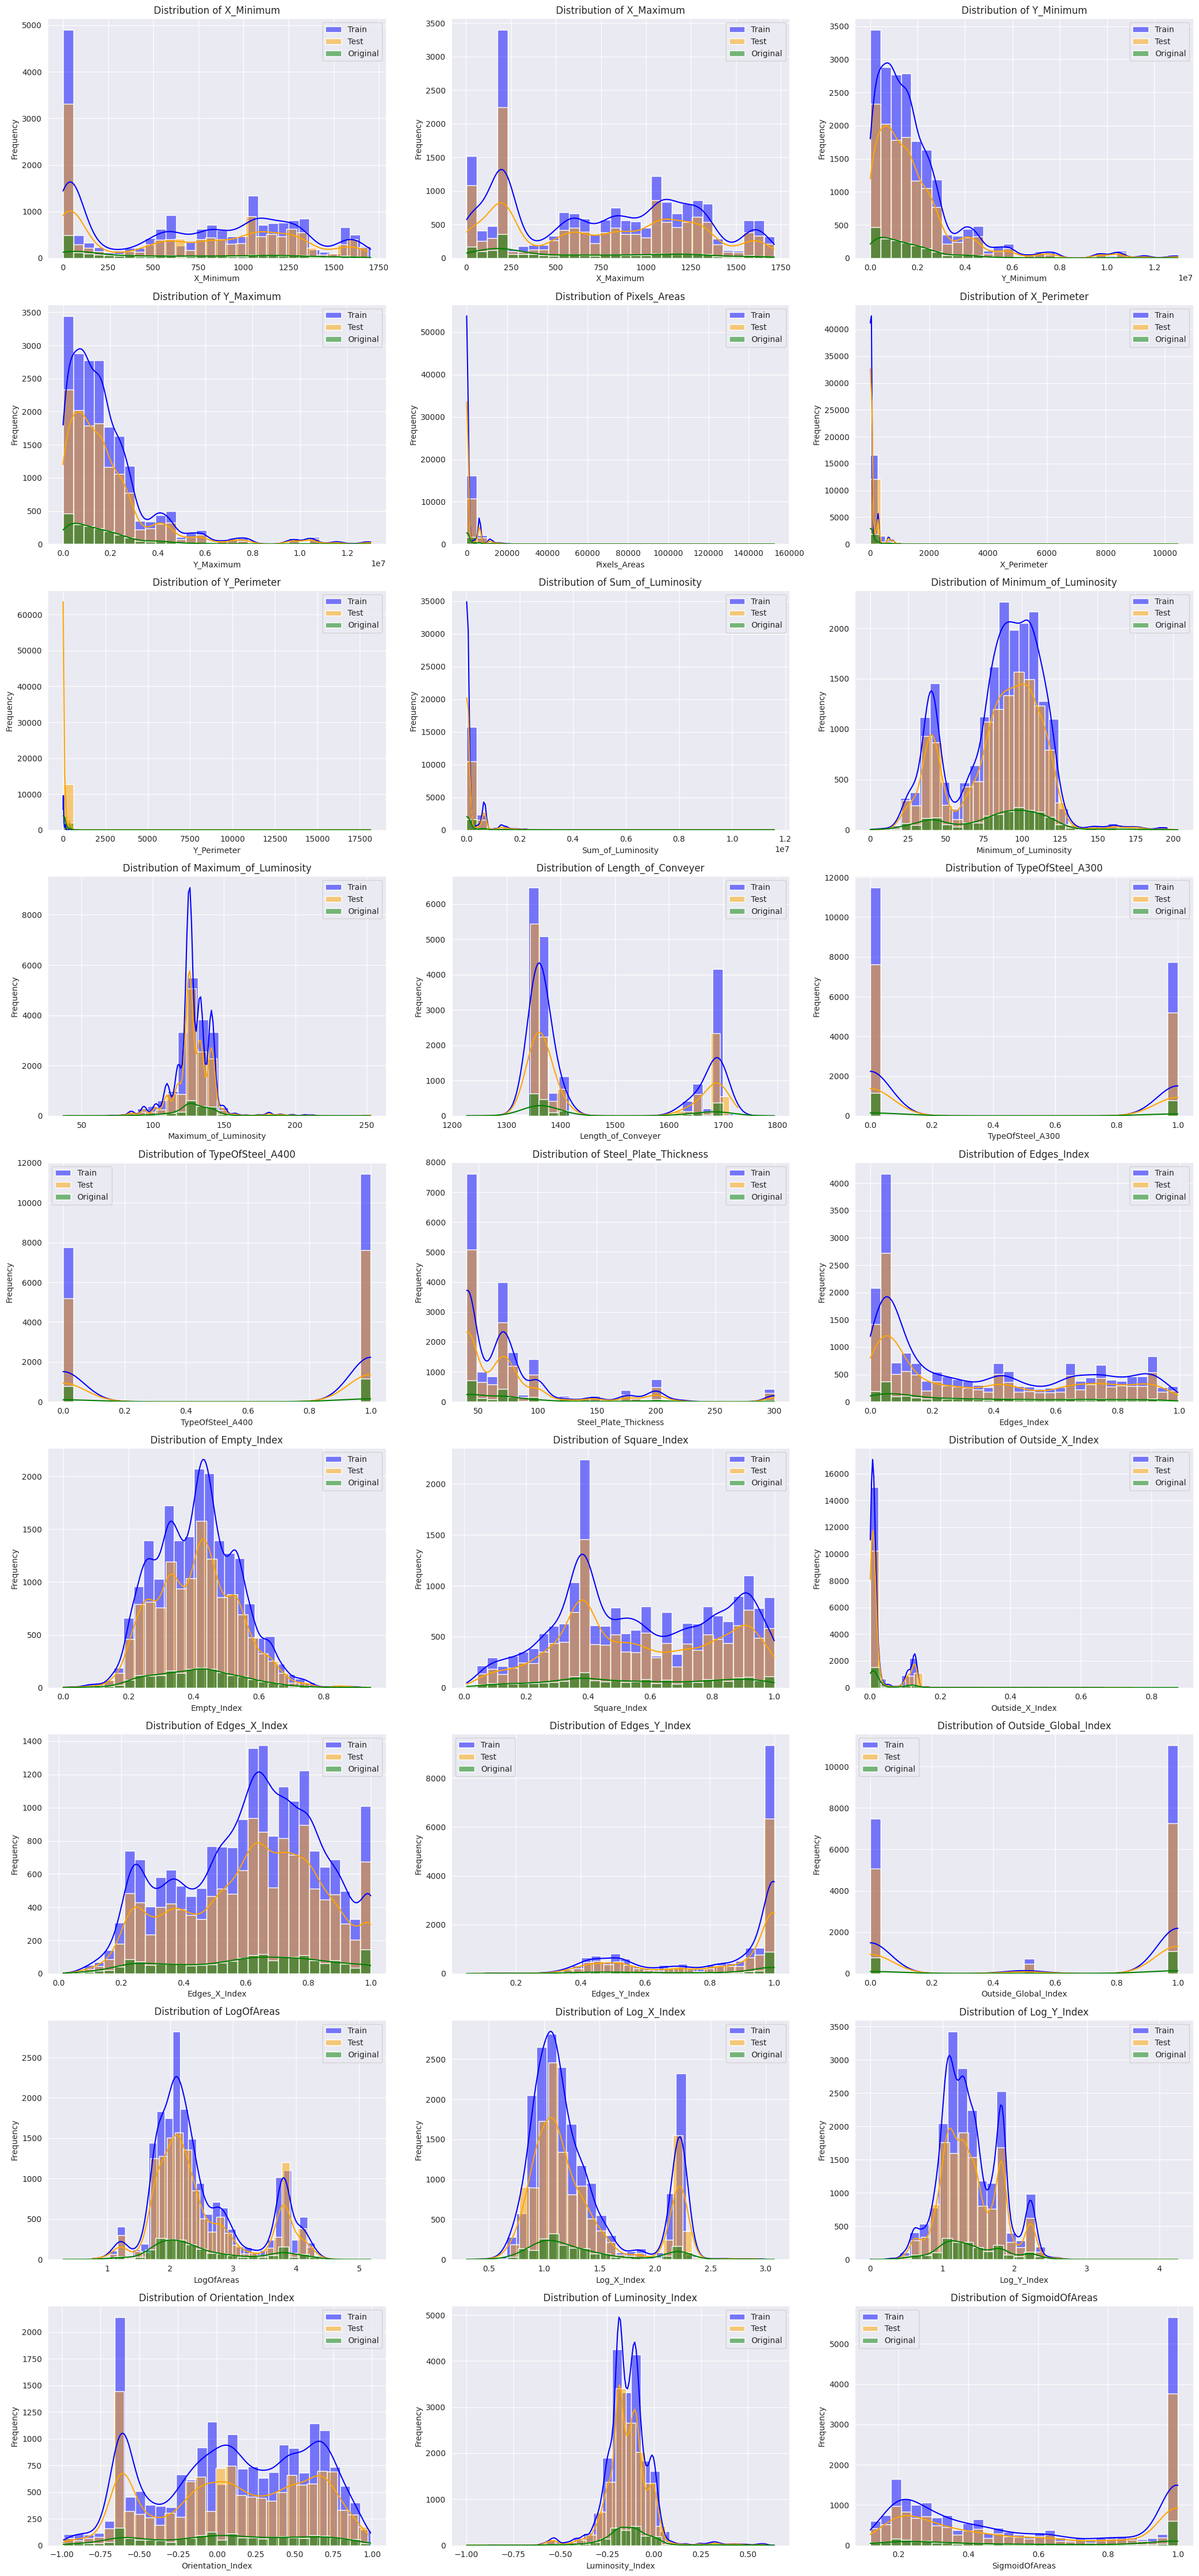

In [ ]:
cont_cols = df_test.columns
colors = ['blue', 'orange', 'green']

num_plots = len(cont_cols)
num_cols = 3
num_rows = -(-num_plots // num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(21, 5 * num_rows))  # Adjust the figure size as needed

for i, feature in enumerate(cont_cols):
    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col] if num_rows > 1 else axes[col]

    sns.histplot(train_copy[feature], kde=True, color=colors[0], label='Train', alpha=0.5, bins=30, ax=ax)
    sns.histplot(test_copy[feature], kde=True, color=colors[1], label='Test', alpha=0.5, bins=30, ax=ax)
    sns.histplot(original_copy[feature], kde=True, color=colors[2], label='Original', alpha=0.5, bins=30, ax=ax)

    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()

if num_plots % num_cols != 0:
    for j in range(num_plots % num_cols, num_cols):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

# Processing Dataframe

## Concate Original Data to Train Data

In [ ]:
print(f'df_train.shape: {df_train.shape} BEFORE concatenate')

df_train.shape: (19219, 34) BEFORE concatenate


In [ ]:
df_train = pd.concat([df_train, df_original])

In [ ]:
df_train = df_train.drop_duplicates()
print(f'df_train.shape: {df_train.shape} AFTER concatenate')

df_train.shape: (21160, 34) AFTER concatenate


## Correlation

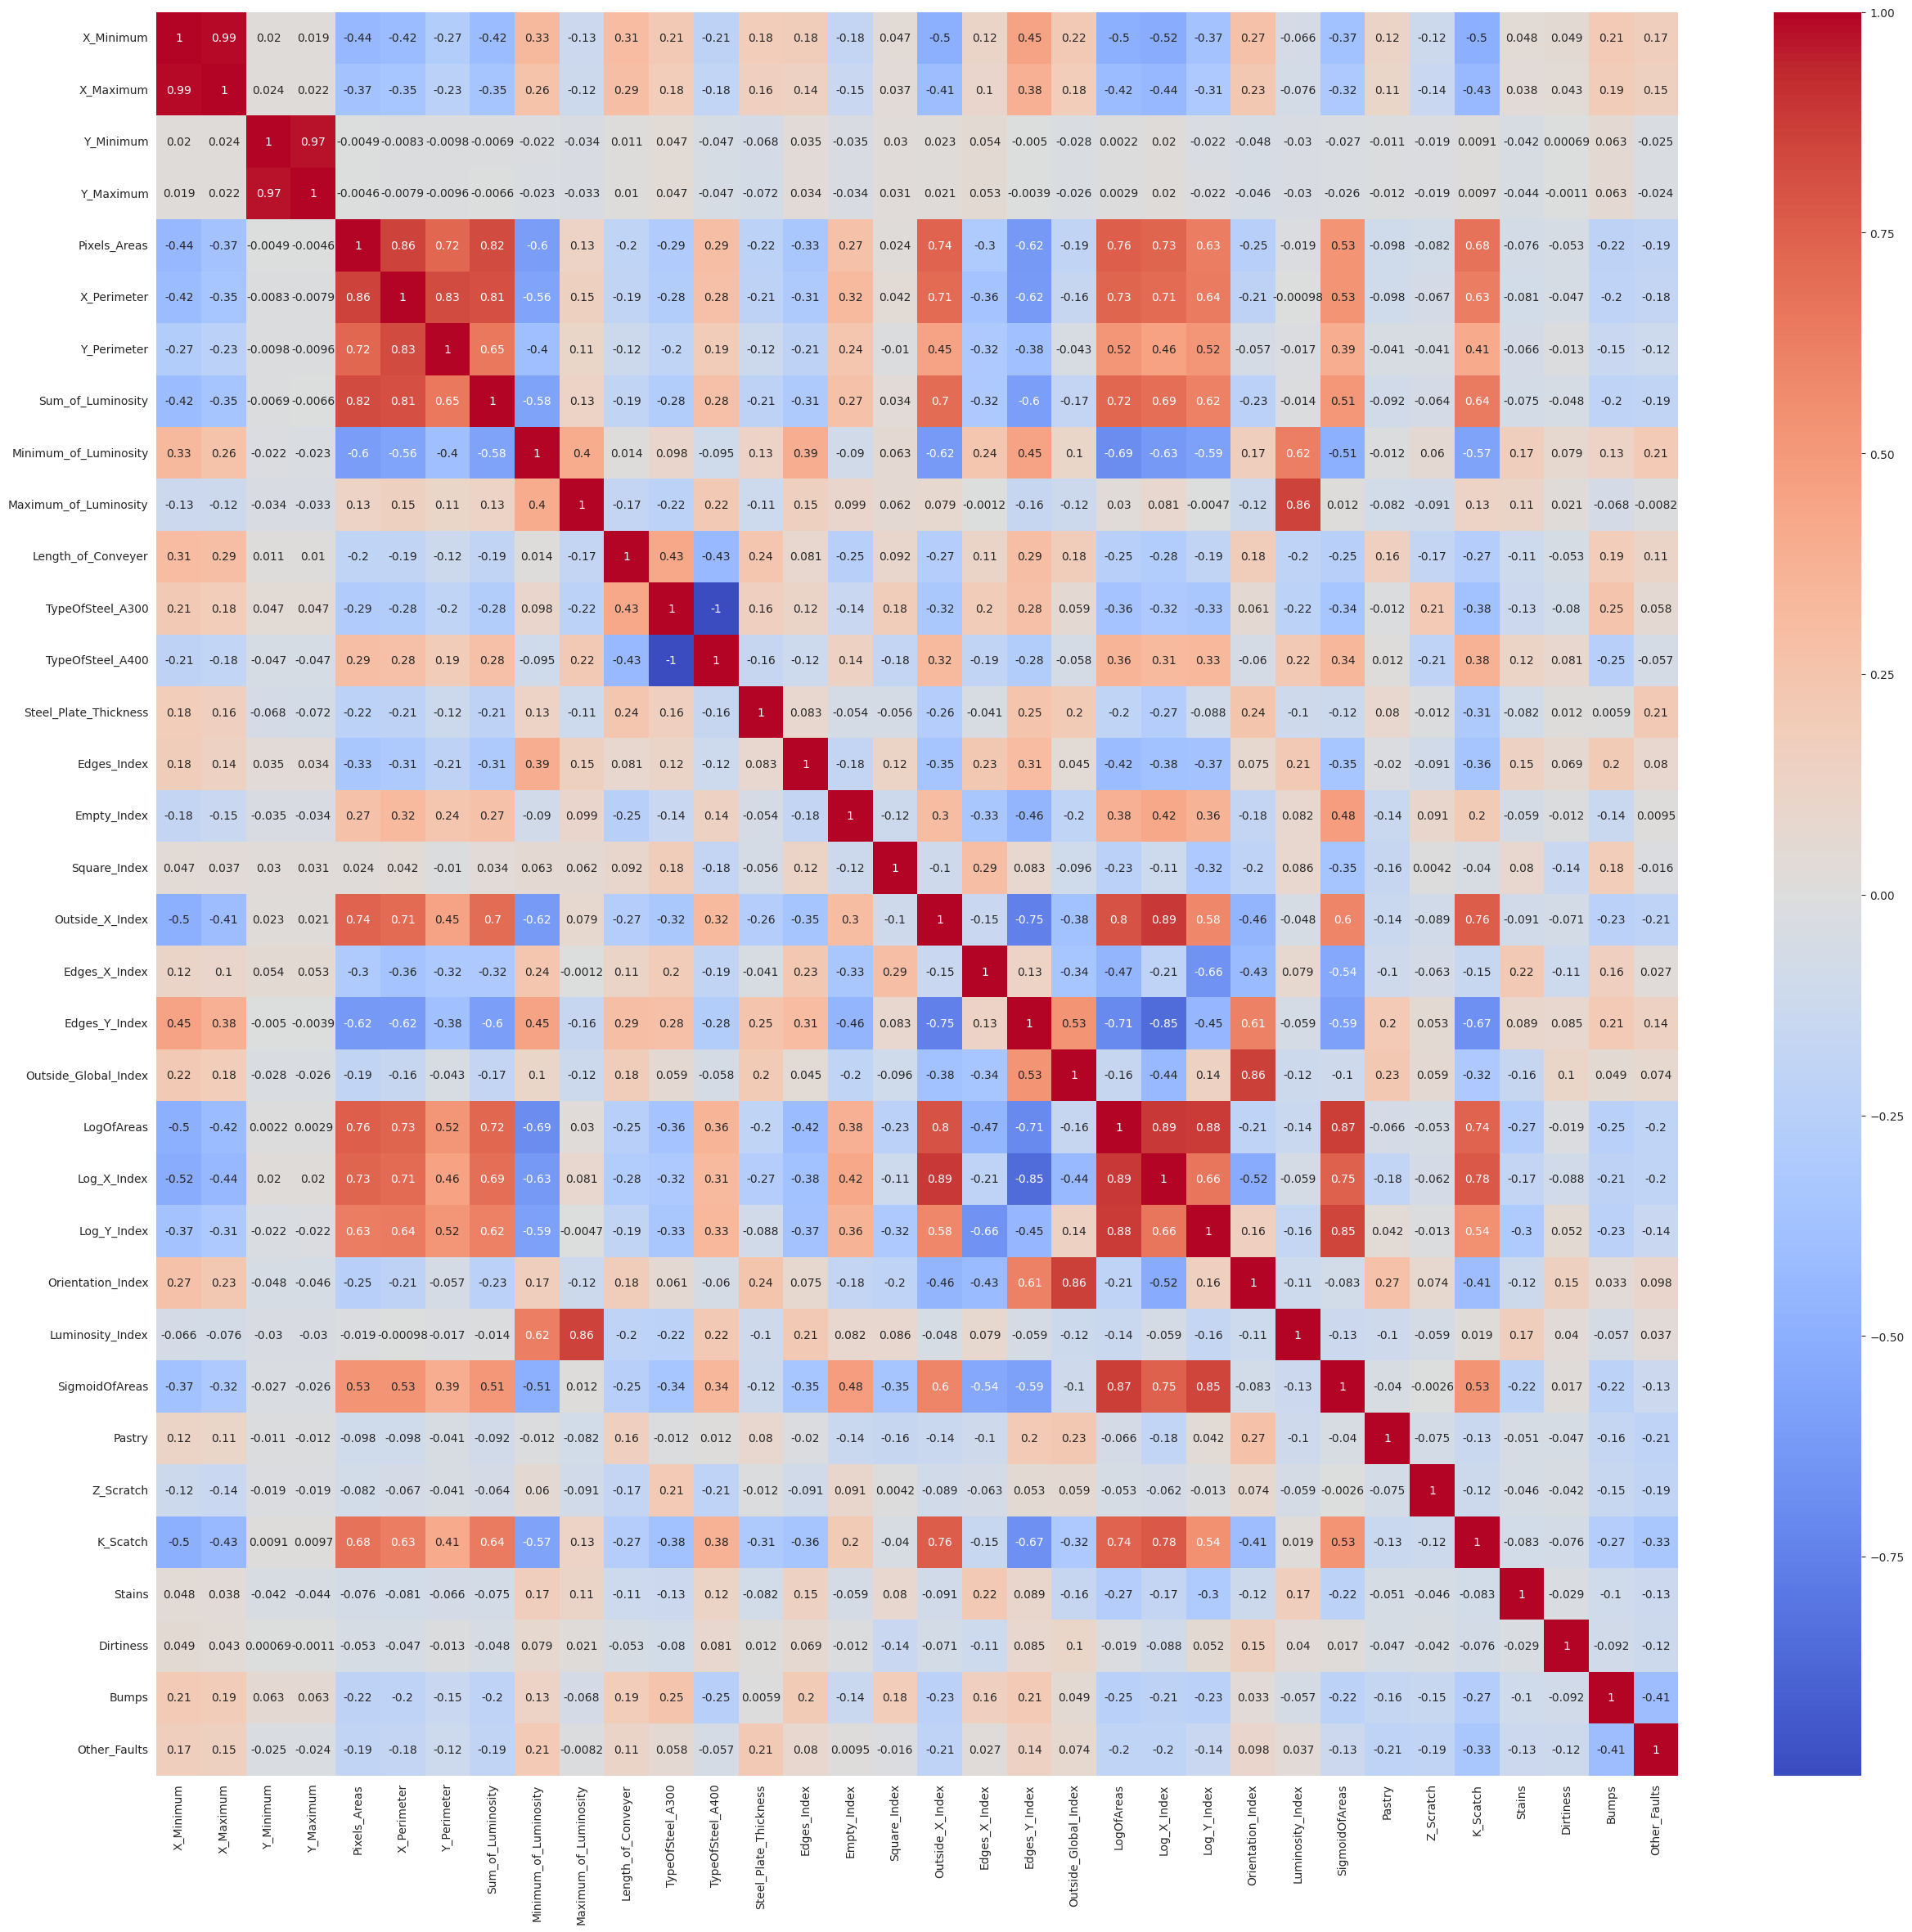

In [ ]:
matrix = df_train.corr()
plt.figure(figsize=(30,28))
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
target_cols = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [ ]:
df_train[df_train[target_cols].sum(axis=1) == 0]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
8,507,521,203252,203261,101,25,12,12530,124,140,1360,0,1,40,0.7210,0.4815,0.3333,0.0176,0.8000,0.7500,0.0,2.0043,1.3802,0.7782,-0.6667,0.0305,0.3601,0,0,0,0,0,0,0
12,1553,1563,2533145,2533151,75,12,11,7987,77,118,1686,1,0,60,0.1182,0.3333,0.9167,0.0053,0.7500,1.0000,1.0,1.8751,0.9542,1.0414,0.0833,-0.2631,0.2051,0,0,0,0,0,0,0
50,867,878,3264755,3264786,167,18,27,19974,106,134,1362,0,1,40,0.7332,0.3416,0.3333,0.0059,0.4444,1.0000,1.0,2.2227,0.9031,1.4314,0.6667,-0.0790,0.4025,0,0,0,0,0,0,0
73,325,361,1090984,1091013,219,37,29,25491,111,134,1373,0,1,40,0.4537,0.5876,0.6429,0.0148,0.5278,0.8261,1.0,2.3404,1.3010,1.4314,0.3571,-0.0104,0.7933,0,0,0,0,0,0,0
93,1162,1174,745366,745380,353,48,46,37930,87,127,1352,0,1,40,0.2227,0.2955,0.3000,0.0081,0.2381,1.0000,1.0,2.5478,1.0414,1.6628,0.7000,-0.1628,0.8612,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19185,507,521,456228,456249,150,37,24,19311,125,143,1362,1,0,100,0.6662,0.6546,0.9091,0.0147,0.5405,0.9167,0.0,2.1761,1.3010,1.3424,-0.0909,0.0376,0.7147,0,0,0,0,0,0,0
19189,575,587,7003,7020,170,18,17,21545,153,175,1353,0,1,100,0.8234,0.2139,0.8235,0.0096,0.7222,1.0000,1.0,2.2304,1.1139,1.2305,0.1765,0.2423,0.3479,0,0,0,0,0,0,0
19191,1644,1657,690095,690120,194,27,26,22254,77,103,1358,1,0,70,0.0130,0.4029,0.6539,0.0096,0.4259,1.0000,1.0,2.2878,1.1139,1.4150,0.3462,-0.3194,0.7174,0,0,0,0,0,0,0
19203,469,492,677297,677417,339,52,37,39229,113,132,1387,0,1,40,0.5204,0.5249,0.7097,0.0123,0.2963,0.7907,1.0,2.5378,1.2305,1.4624,0.2903,-0.0558,0.9703,0,0,0,0,0,0,0


## Categorical Feature Selestion

In [ ]:
target_cols = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [ ]:
print('----------train data ------------')
summary_df = summary(df_train)
summary_df.style.background_gradient(cmap='Reds')

----------train data ------------


,dtypes,missing#,missing%,uniques,count,uniques%
X_Minimum,int64,0,0.000000,1218,21160,0.057561
X_Maximum,int64,0,0.000000,1272,21160,0.060113
Y_Minimum,int64,0,0.000000,3463,21160,0.163658
Y_Maximum,int64,0,0.000000,3450,21160,0.163043
Pixels_Areas,int64,0,0.000000,1160,21160,0.054820
X_Perimeter,int64,0,0.000000,471,21160,0.022259
Y_Perimeter,int64,0,0.000000,338,21160,0.015974
Sum_of_Luminosity,int64,0,0.000000,2619,21160,0.123771
Minimum_of_Luminosity,int64,0,0.000000,165,21160,0.007798
Maximum_of_Luminosity,int64,0,0.000000,104,21160,0.004915


In [ ]:
print('----------test data ------------')
summary(df_test).style.background_gradient(cmap='Blues')

----------test data ------------


,dtypes,missing#,missing%,uniques,count,uniques%
X_Minimum,int64,0,0.000000,1131,12814,0.088263
X_Maximum,int64,0,0.000000,1188,12814,0.092711
Y_Minimum,int64,0,0.000000,2781,12814,0.217028
Y_Maximum,int64,0,0.000000,2827,12814,0.220618
Pixels_Areas,int64,0,0.000000,1070,12814,0.083502
X_Perimeter,int64,0,0.000000,435,12814,0.033947
Y_Perimeter,int64,0,0.000000,316,12814,0.024661
Sum_of_Luminosity,int64,0,0.000000,2300,12814,0.179491
Minimum_of_Luminosity,int64,0,0.000000,161,12814,0.012564
Maximum_of_Luminosity,int64,0,0.000000,99,12814,0.007726


Pemilihan fitur dengan jumlah nilai unik yang tepat sangat penting dalam pemodelan karena:

1. **Mencegah Overfitting:** Fitur dengan banyak nilai unik dapat meningkatkan kompleksitas model, meningkatkan risiko overfitting, di mana model mempelajari noise atau variasi acak dalam data pelatihan.

2. **Meningkatkan Kinerja Model:** Memilih fitur-fitur yang lebih relevan dan informatif dapat meningkatkan kinerja model dengan fokus pada informasi yang paling penting untuk memprediksi target.

3. **Mempercepat Pelatihan dan Prediksi:** Mengurangi jumlah fitur dengan nilai unik yang tinggi dapat mempercepat waktu pelatihan dan prediksi model, karena model perlu memproses dan mempertimbangkan lebih sedikit informasi.

4. **Meningkatkan Interpretabilitas:** Mengurangi jumlah fitur dengan nilai unik yang tinggi dapat meningkatkan interpretabilitas model, karena memungkinkan pemahaman yang lebih baik tentang kontribusi relatif dari setiap fitur terhadap prediksi model.

5. **Efisiensi Penyimpanan dan Pengolahan Data:** Mengurangi jumlah fitur dengan nilai unik yang tinggi dapat mengurangi kebutuhan akan penyimpanan dan sumber daya komputasi yang besar untuk pemrosesan dan analisis data.

In [ ]:
cat_features = df_train.columns[np.where(summary_df['uniques%']<=0.06)[0].tolist()] # Mengambil feature yang nilai presentase Unique nya dibawah 6%
cat_features = [feature for feature in cat_features if feature not in target_cols] # Mengambil feature jika dia bukan termasuk Target Columns
cat_features

['X_Minimum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'Steel_Plate_Thickness',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'SigmoidOfAreas']

## Target Analysis

In [ ]:
df_train[target_cols].describe()

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,21160.000000,21160.000000,21160.000000,21160.000000,21160.000000,21160.000000,21160.000000
mean,0.076749,0.063327,0.180671,0.030246,0.025520,0.244093,0.341730
std,0.266198,0.243556,0.384755,0.171267,0.157701,0.429558,0.474301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


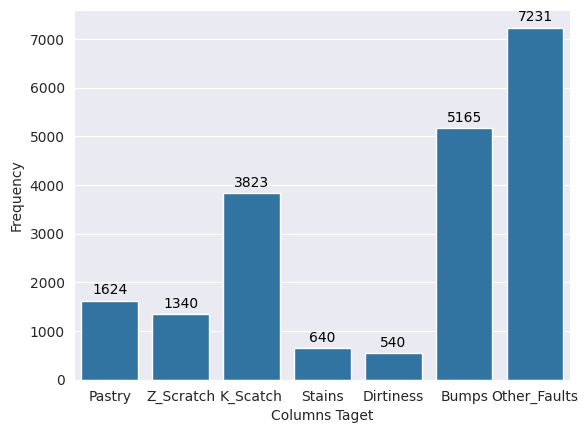

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style to darkgrid
sns.set_style('darkgrid')

# Menghitung jumlah frekuensi tiap kategori pada fitur target
frequency_counts = df_train[target_cols].sum(axis=0)

# Memplot diagram batang menggunakan seaborn
ax = sns.barplot(x=frequency_counts.index, y=frequency_counts.values)

# Menambahkan label sumbu y dan x
plt.ylabel('Frequency')
plt.xlabel('Columns Taget')

# Menambahkan label pada setiap batang
for index, value in enumerate(frequency_counts.values):
    plt.annotate(value, xy=(index, value), xytext=(0, 5), textcoords='offset points', ha='center', color='black')

# Menampilkan plot
plt.show()

## Feature Engineering


In [ ]:
feature_exclude = ['TypeOfSteel_A300','TypeOfSteel_A400']

In [ ]:
# Menghasilkan daftar fitur kategorikal yang tidak termasuk dalam daftar fitur yang dikecualikan
# Jika sebuah fitur kategorikal ada dalam daftar feature_exclude, maka fitur tersebut tidak dimasukkan ke dalam daftar cat_features.
cat_features = [feature for feature in cat_features if feature not in feature_exclude]

# Menghapus kolom-kolom yang ada dalam daftar feature_exclude dari data latih (df_train) dan data uji (df_test).
train = df_train.drop(columns=feature_exclude)
test = df_test.drop(columns=feature_exclude)

In [ ]:
train.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index',
       'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index',
       'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index',
       'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas', 'Pastry',
       'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults'],
      dtype='object')

In [ ]:
def extract_features(x):
    x_copy = x.copy()
    x_copy['X_Minimum_log'] = np.log1p(x_copy['X_Minimum'])
    x_copy['X_Maximum_log'] = np.log1p(x_copy['X_Maximum'])
    x_copy['Y_Minimum_log'] = np.log1p(x_copy['Y_Minimum'])
    x_copy['Y_Maximum_log'] = np.log1p(x_copy['Y_Maximum'])
    x_copy['Outside_X_Index_log'] = np.log1p(x_copy['Outside_X_Index'])
    x_copy['Edges_X_Index_log'] = np.log1p(x_copy['Edges_X_Index'])
    x_copy['Edges_Y_Index_log'] = np.log1p(x_copy['Edges_Y_Index'])
    x_copy['Pixels_Areas_log'] = np.log1p(x_copy['Pixels_Areas'])
    x_copy['X_Perimeter_log'] = np.log1p(x_copy['X_Perimeter'])
    x_copy['Y_Perimeter_log'] = np.log1p(x_copy['Y_Perimeter'])
    x_copy['Sum_of_Luminosity_log'] = np.log1p(x_copy['Sum_of_Luminosity'])
    x_copy['Orientation_Index_log'] = np.log1p(x_copy['Orientation_Index'])
    return x_copy

ExtractFeatures = FunctionTransformer(extract_features)

# Modelling Here

In [ ]:
CFG = {
    'RANDOM_SEED':73,
    'n_splits':10,
}

In [ ]:
skf = StratifiedKFold(n_splits = CFG['n_splits'])

def cross_val_model(estimators, train_data, test_data, target_col, cv = skf, verbose = True):
    '''
        estimators : pipeline consists preprocessing, encoder & model
        cv : Method for cross validation (default: StratifiedKfold)
        verbose : print train/valid score (yes/no)
    '''
    X = train_data.copy()
    y = X.pop(target_col)

    test_predictions = np.zeros((len(test_data), 2))
    valid_predictions = np.zeros((len(X), 2))

    val_scores, train_scores, ROC_AUC_scores = [], [], []
    for fold, (train_ind, valid_ind) in enumerate(skf.split(X, y)):
        model = clone(estimators)

        X_train = X.iloc[train_ind]
        y_train = y.iloc[train_ind]
        #train_set = [data_index_dict[i] for i in train_ind]
        #print(f'train_set:{train_set}')
        #remove instances that appeared in train sampling set
        #valid_ind = [i for i in valid_ind if data_index_dict[i] not in train_set]
        #print('here')
        X_valid = X.iloc[valid_ind]
        y_valid = y.iloc[valid_ind]

        model.fit(X_train, y_train)
        if verbose:
            print('-' * 50)
            print(f'Fold: {fold}')
            print(f'Train Accuracy Score:{accuracy_score(y_true=y_train, y_pred=model.predict(X_train))}')
            print(f'Valid Accuracy Score:{accuracy_score(y_true=y_valid, y_pred=model.predict(X_valid))}')
            print(f'Train ROC_AUC Score:{roc_auc_score(y_true=y_train, y_score=model.predict_proba(X_train)[:, 1])}')
            print(f'Valid ROC_AUC Score:{roc_auc_score(y_true=y_valid, y_score=model.predict_proba(X_valid)[:, 1])}')
            print('-'*50)

        test_predictions += model.predict_proba(test_data)/cv.get_n_splits()
        valid_predictions[valid_ind] = model.predict_proba(X_valid)
        val_scores.append(accuracy_score(y_true=y_valid, y_pred=model.predict(X_valid)))
        ROC_AUC_scores.append(roc_auc_score(y_true=y_valid, y_score=model.predict_proba(X_valid)[:, 1]))
        if verbose:
            print(f'Average Mean Accuracy Score:{np.array(val_scores).mean()}')
            print(f'Average Mean ROC_AUC Score:{np.array(ROC_AUC_scores).mean()}')

    return val_scores, valid_predictions, test_predictions

In [ ]:
score_list, oof_list, predict_list = pd.DataFrame(), pd.DataFrame(), pd.DataFrame() # Buat dataframe kosong untuk menampung nilai

## Random Forest Pipeline

In [ ]:
# Execute Random Forest Pipeline
for t in target_cols:
    RFC = make_pipeline(
                        ExtractFeatures,
                        MEstimateEncoder(cols=cat_features),
                        RandomForestClassifier(random_state=CFG['RANDOM_SEED'])
                    )
    train_data = train.drop(columns=[col for col in target_cols if col!=t])
    val_scores,val_predictions,test_predictions = cross_val_model(RFC, train_data, test, t)

    # Save train/test predictions in dataframes
    oof_list[f"rfc_{t}"] = val_predictions[:,1]
    predict_list[f"rfc_{t}"] = test_predictions[:,1]

--------------------------------------------------
Fold: 0
Train Accuracy Score:1.0
Valid Accuracy Score:0.916351606805293
Train ROC_AUC Score:1.0
Valid ROC_AUC Score:0.8064748474165055
--------------------------------------------------
Average Mean Accuracy Score:0.916351606805293
Average Mean ROC_AUC Score:0.8064748474165055
--------------------------------------------------
Fold: 1
Train Accuracy Score:1.0
Valid Accuracy Score:0.9187145557655955
Train ROC_AUC Score:1.0
Valid ROC_AUC Score:0.8171067263100698
--------------------------------------------------
Average Mean Accuracy Score:0.9175330812854443
Average Mean ROC_AUC Score:0.8117907868632877
--------------------------------------------------
Fold: 2
Train Accuracy Score:0.9999474900231043
Valid Accuracy Score:0.9187145557655955
Train ROC_AUC Score:0.9999999999999999
Valid ROC_AUC Score:0.817831734839582
--------------------------------------------------
Average Mean Accuracy Score:0.9179269061121613
Average Mean ROC_AUC Score

In [ ]:
predict_list

,rfc_Pastry,rfc_Z_Scratch,rfc_K_Scatch,rfc_Stains,rfc_Dirtiness,rfc_Bumps,rfc_Other_Faults
0,0.152,0.001,0.003,0.029,0.005,0.216,0.681
1,0.079,0.051,0.018,0.000,0.020,0.175,0.378
2,0.005,0.016,0.004,0.000,0.008,0.369,0.431
3,0.034,0.014,0.000,0.001,0.005,0.333,0.545
4,0.001,0.010,0.002,0.000,0.007,0.669,0.387
...,...,...,...,...,...,...,...
12809,0.077,0.107,0.001,0.000,0.002,0.188,0.507
12810,0.187,0.005,0.024,0.014,0.100,0.220,0.474
12811,0.000,0.000,0.944,0.000,0.000,0.000,0.069
12812,0.430,0.024,0.010,0.000,0.052,0.125,0.392


## XGBoost Model

In [ ]:
class xgb_objective:
    def __init__(self, train_data, test_data, target_col):
        self.train_data = train_data.copy()
        self.test_data = test_data.copy()
        self.target_col = target_col

    def __call__(self, trial):
        params = {
            'grow_policy': trial.suggest_categorical('grow_policy', ["depthwise", "lossguide"]),
            'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
            'gamma' : trial.suggest_float('gamma', 1e-9, 1.0),
            'subsample': trial.suggest_float('subsample', 0.25, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.25, 1.0),
            'max_depth': trial.suggest_int('max_depth', 0, 24),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 30),
            'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 10.0, log=True),
            'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 10.0, log=True),
        }

        params['booster'] = 'gbtree'
        params['objective'] = 'binary:logistic' #'multi:softmax'
        params["device"] = "gpu"
        params["verbosity"] = 0
        params['tree_method'] = "gpu_hist"


        optuna_model = make_pipeline(
                        MEstimateEncoder(cols=cat_features),
                        XGBClassifier(**params,seed=CFG['RANDOM_SEED'])
                       )

        val_scores, _, _ = cross_val_model(optuna_model,self.train_data, self.test_data, self.target_col, verbose = False)
        return np.array(val_scores).mean()

In [ ]:
# Tune using Optuna
TUNE = False
if TUNE:
    for t in target_cols:
        train_data = train.drop(columns=[col for col in target_cols if col!=t])
        obj = xgb_objective(train_data, test, t)
        xgb_study = optuna.create_study(direction = 'maximize',study_name="XGB")
        xgb_study.optimize(obj, 30)
        params = xgb_study.best_trial.params
        optuna_model = make_pipeline(
                                 MEstimateEncoder(cols=cat_features),
                                 XGBClassifier(**params,seed=CFG['RANDOM_SEED'])
                                )
        val_scores,val_predictions,test_predictions = cross_val_model(optuna_model, train_data, test, t)

        # Save train/test predictions in dataframes
        oof_list[f"xgb_{t}"] = val_predictions[:,1]
        predict_list[f"xgb_{t}"] = test_predictions[:,1]
else:
    best_params = {'grow_policy': 'depthwise', 'n_estimators': 982,
               'learning_rate': 0.050053726931263504, 'gamma': 0.5354391952653927,
               'subsample': 0.7060590452456204, 'colsample_bytree': 0.37939433412123275,
               'max_depth': 23, 'min_child_weight': 21, 'reg_lambda': 9.150224029846654e-08,
               'reg_alpha': 5.671063656994295e-08}
    best_params['booster'] = 'gbtree'
    best_params['objective'] = 'binary:logistic'#'multi:softmax'
    best_params["device"] = "cpu"
    best_params["verbosity"] = 1

    XGB = make_pipeline(
                    MEstimateEncoder(cols=cat_features),
                    XGBClassifier(**best_params,seed=CFG['RANDOM_SEED'])
                   )
    for t in target_cols:
        train_data = train.drop(columns=[col for col in target_cols if col!=t])
        val_scores, val_predictions, test_predictions = cross_val_model(XGB, train_data, test, t)
        oof_list[f"xgb_{t}"] = val_predictions[:,1]
        predict_list[f"xgb_{t}"] = test_predictions[:,1]

--------------------------------------------------
Fold: 0
Train Accuracy Score:0.9879752152909053
Valid Accuracy Score:0.9083175803402647
Train ROC_AUC Score:0.9978340691986783
Valid ROC_AUC Score:0.7803050406257503
--------------------------------------------------
Average Mean Accuracy Score:0.9083175803402647
Average Mean ROC_AUC Score:0.7803050406257503
--------------------------------------------------
Fold: 1
Train Accuracy Score:0.9870825456836799
Valid Accuracy Score:0.9092627599243857
Train ROC_AUC Score:0.9977361500639332
Valid ROC_AUC Score:0.7980401076613973
--------------------------------------------------
Average Mean Accuracy Score:0.9087901701323251
Average Mean ROC_AUC Score:0.7891725741435738
--------------------------------------------------
Fold: 2
Train Accuracy Score:0.9868725057760974
Valid Accuracy Score:0.916351606805293
Train ROC_AUC Score:0.9976825415745894
Valid ROC_AUC Score:0.801376094620721
--------------------------------------------------
Average Mean

## Catboost Model

In [ ]:
class cat_objective:
    def __init__(self, train_data, test_data, target_col):
        self.train_data = train_data.copy()
        self.test_data = test_data.copy()
        self.target_col = target_col

    def __call__(self, trial):
        params = {
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'depth': trial.suggest_int('depth', 3, 10),
            'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
            'bagging_temperature': trial.suggest_float('bagging_temperature', 0.1, 1.0),
            'random_seed': CFG['RANDOM_SEED'],
            'verbose': False,
            'task_type': "CPU",
            'iterations': trial.suggest_int('iterations', 100, 1000)  # Menambahkan batasan untuk nilai "iterations"
        }
        optuna_model = make_pipeline(
                    ExtractFeatures,
                    CatBoostClassifier(**params)
        )
        val_scores,_,_ = cross_val_model(optuna_model, self.train_data, self.test_data, self.target_col, verbose=False)
        return np.array(val_scores).mean()

In [ ]:
# Tune using Optuna
TUNE = False
if TUNE:
    for t in target_cols:
        train_data = train.drop(columns=[col for col in target_cols if col!=t])
        obj = cat_objective(train_data, test, t)
        cat_study = optuna.create_study(direction = 'maximize',study_name="CAT")
        cat_study.optimize(obj, 30)
        params = cat_study.best_trial.params
        optuna_model = make_pipeline(
                                 CatBoostClassifier(**params, cat_features=cat_features)
                                )
        val_scores,val_predictions,test_predictions = cross_val_model(optuna_model, train_data, test, t)

        # Save train/test predictions in dataframes
        oof_list[f"cat_{t}"] = val_predictions[:,1]
        predict_list[f"cat_{t}"] = test_predictions[:,1]
else:
    params = {'learning_rate': 0.13762007048684638,
              'depth': 5,
              'l2_leaf_reg': 5.285199432056192,
              'bagging_temperature': 0.6029582154263095,
              'random_seed': CFG['RANDOM_SEED'],
              'verbose': False,
              'task_type': "CPU",  # Mengubah task_type menjadi "CPU"
              'iterations': 1000}

    CB = make_pipeline(
                      CatBoostClassifier(**params)
                    )
    for t in target_cols:
        train_data = train.drop(columns=[col for col in target_cols if col!=t])
        val_scores,val_predictions,test_predictions = cross_val_model(CB, train_data, test, t)
        oof_list[f"cat_{t}"] = val_predictions[:,1]
        predict_list[f"cat_{t}"] = test_predictions[:,1]

--------------------------------------------------
Fold: 0
Train Accuracy Score:0.9856122663306028
Valid Accuracy Score:0.9177693761814745
Train ROC_AUC Score:0.9984741810155611
Valid ROC_AUC Score:0.8445322668284114
--------------------------------------------------
Average Mean Accuracy Score:0.9177693761814745
Average Mean ROC_AUC Score:0.8445322668284114
--------------------------------------------------
Fold: 1
Train Accuracy Score:0.9854022264230203
Valid Accuracy Score:0.9210775047258979
Train ROC_AUC Score:0.9980841384073159
Valid ROC_AUC Score:0.8610763612469515
--------------------------------------------------
Average Mean Accuracy Score:0.9194234404536862
Average Mean ROC_AUC Score:0.8528043140376815
--------------------------------------------------
Fold: 2
Train Accuracy Score:0.985454736399916
Valid Accuracy Score:0.9191871455576559
Train ROC_AUC Score:0.9982773312651402
Valid ROC_AUC Score:0.8605677495987971
--------------------------------------------------
Average Mea

## Save Final Result Prediction

In [ ]:
# Membuat direktori jika belum ada
directory = "/content/drive/MyDrive/Colab Notebooks/2. Satria Data 2024/Steel Plate Defect Prediction/Dataset/Submissions"
if not os.path.exists(directory):
    os.makedirs(directory)

# Menyimpan file CSV
predict_list.to_csv("/content/drive/MyDrive/Colab Notebooks/2. Satria Data 2024/Steel Plate Defect Prediction/Dataset/Submissions/RFC_XGB_CAT Submissions.csv")

# Ensemble Submissions

In [ ]:
sample_submission  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Satria Data 2024/Steel Plate Defect Prediction/Dataset/sample_submission.csv') # Submissions Data

In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Satria Data 2024/Steel Plate Defect Prediction/Dataset/Submissions/1. submission [0.89478] - Best.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Satria Data 2024/Steel Plate Defect Prediction/Dataset/Submissions/2. submission [0.89395].csv')
df_3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Satria Data 2024/Steel Plate Defect Prediction/Dataset/Submissions/3. submission [0.89449].csv')
df_4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Satria Data 2024/Steel Plate Defect Prediction/Dataset/Submissions/7. submission XGB [0.89532].csv')

In [ ]:
weights = {
    'df_1': 0.25,
    'df_2': 0.10,
    'df_3': 0.25,
    'df_4': 0.90
}

In [ ]:
submission = pd.DataFrame()

In [ ]:
target_cols = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [ ]:
for t in target_cols:
    submission[t] = weights['df_4']*df_4[t] + 0.1*(weights['df_3'] * df_3[t]+
                           weights['df_1'] * df_1[t]+
                           weights['df_2'] * df_2[t])

In [ ]:
submission.insert(0, 'id', sample_submission['id'])

In [ ]:
submission.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.498257,0.000815,0.003980,0.001518,0.018335,0.139440,0.300165
1,19220,0.262644,0.019290,0.005734,0.001841,0.152967,0.176681,0.336707
2,19221,0.002145,0.037912,0.049152,0.002303,0.007812,0.310243,0.547150
3,19222,0.141382,0.001832,0.000796,0.002924,0.010741,0.384497,0.416492
4,19223,0.002722,0.002641,0.000952,0.005312,0.006456,0.611788,0.331765


In [ ]:
# submission.to_csv('/content/drive/MyDrive/Colab Notebooks/2. Satria Data 2024/Steel Plate Defect Prediction/Dataset/Submissions/8.Submission_Combined[1,2,3,7].csv', index=False)